In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/og_50_startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
import seaborn as sns

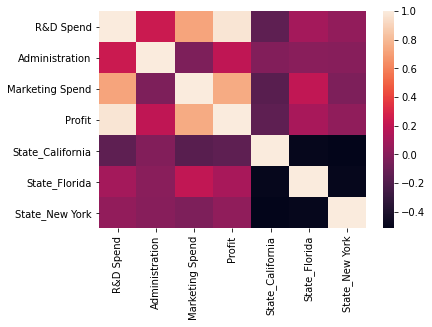

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [ ]:
y = df['Profit']
df.drop(['Profit'], axis=1, inplace=True)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [ ]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.15, shuffle=True, random_state=56)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42, 6)
(8, 6)
(42,)
(8,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = lr_model.predict(X_test)

In [ ]:
preds

array([ 43193.02969164,  73077.06984454,  64233.30001378, 162126.40644496,
       115766.26558478,  68389.42685208,  63711.9613482 , 172008.95681597])

In [ ]:
y_test.values

array([ 64926.08,  78239.91,  81229.06, 155752.6 , 118474.03,  71498.49,
        65200.33, 182901.99])

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
nums = [i for i in range(1,9)]

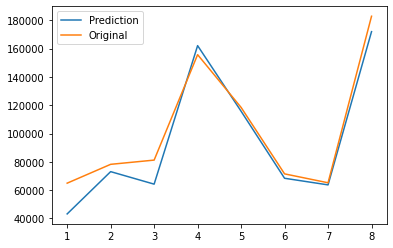

In [ ]:
plt.plot(nums, preds, label='Prediction')
plt.plot(nums, y_test, label='Original')
plt.legend()
plt.show()

In [ ]:
preds

array([ 43193.02969164,  73077.06984454,  64233.30001378, 162126.40644496,
       115766.26558478,  68389.42685208,  63711.9613482 , 172008.95681597])

In [ ]:
y_test

45     64926.08
40     78239.91
38     81229.06
7     155752.60
20    118474.03
42     71498.49
44     65200.33
3     182901.99
Name: Profit, dtype: float64

In [ ]:
sum((preds - y_test.values)**2)/8

120791666.9077021

In [ ]:
sum(abs(preds - y_test.values))/8

8557.96078674658